### Set up Notebook
Import Functions Necessary to Populate Notebook

In [1]:
#import functions
from functions import *
import warnings
warnings.filterwarnings('ignore')


In [2]:
#This turns API call on or off (false=off).  Building this takes 20 minutes.
CREATE_DF_GENE_CTS=False

### Import and Transform Data

In [3]:
if CREATE_DF_GENE_CTS:
    df_gene_counts=create_gene_counts_df()
else:
    df_gene_counts=pd.read_csv('..//data//interim//df_gene_counts.csv')

In [4]:
df_gene_counts.head()

,Unnamed: 0,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,link
0,0,1,NM_130786.3,1766.00,1726.13,16.00,0.97,0.68,/api/v2/well_known_file_download/496128434
1,1,10,"NM_000015.2,XM_011544358.1",1317.00,1277.13,1.00,0.08,0.06,/api/v2/well_known_file_download/496128434
2,2,100,"NM_000022.2,XM_005260236.2,XM_011528478.1,XM_0...",1493.40,1453.54,19.00,1.37,0.97,/api/v2/well_known_file_download/496128434
3,3,1000,"NM_001792.3,XM_005258181.2,XM_005258182.1,XM_0...",3838.31,3798.45,1341.00,36.96,25.99,/api/v2/well_known_file_download/496128434
4,4,10000,"NM_001206729.1,NM_005465.4,NM_181690.2,XM_0052...",2773.40,2733.53,4572.14,175.26,123.24,/api/v2/well_known_file_download/496128434


In [5]:
ct_matrix, exp_design, tpm_matrix, df_gene_counts, genes, tbidata, donor=create_ct_matrix_tpm_matrix()


In [6]:
ct_matrix.head()

rnaseq_profile_id,488395315,496100277,496100278,496100279,496100281,496100283,496100284,496100285,496100287,496100288,...,496100661,496100663,496100664,496100665,496100666,496100667,496100669,496100670,496100671,496100672
gene_id_mapped,,,,,,,,,,,,,,,,,,,,,
499304660,12,1,0,0,0,0,0,3,4,0,...,10,11,0,13,8,0,0,4,0,0
499304661,71,194,90,81,83,104,104,79,75,136,...,135,101,109,105,109,145,201,141,106,115
499304664,0,0,0,3,0,0,2,2,0,2,...,0,1,0,1,2,2,2,0,1,0
499304665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499304666,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,2,0,0,0


In [7]:
exp_design.head()

,act_demented
rnaseq_profile_id,
488395315,NoDementia
496100277,NoDementia
496100278,NoDementia
496100279,NoDementia
496100281,Dementia


In [8]:
tpm_matrix.head()

rnaseq_profile_id,488395315,496100277,496100278,496100279,496100281,496100283,496100284,496100285,496100287,496100288,...,496100661,496100663,496100664,496100665,496100666,496100667,496100669,496100670,496100671,496100672
gene_id_mapped,,,,,,,,,,,,,,,,,,,,,
499304660,1.29,0.07,0.00,0.00,0.00,0.00,0.00,0.24,0.34,0.00,...,0.74,0.74,0.00,0.93,0.49,0.00,0.00,0.28,0.00,0.00
499304661,6.82,9.39,5.04,5.16,4.97,7.13,7.40,5.16,5.40,7.21,...,9.08,6.28,6.09,7.03,6.01,9.36,12.51,10.06,6.25,6.88
499304662,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
499304663,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
499304664,0.08,0.04,0.00,0.28,0.00,0.04,0.23,0.16,0.00,0.21,...,0.00,0.10,0.03,0.07,0.19,0.19,0.16,0.00,0.07,0.00


In [9]:
genes.head()

,gene_id,chromosome,gene_entrez_id,gene_symbol,gene_name
0,499304660,1,100287102,DDX11L1,DEAD/H (Asp-Glu-Ala-Asp/His) box helicase 11 l...
1,499304661,1,653635,WASH7P,WAS protein family homolog 7 pseudogene
2,499304662,1,102466751,MIR6859-1,microRNA 6859-1
3,499304663,1,100302278,MIR1302-2,microRNA 1302-2
4,499304664,1,645520,FAM138A,"family with sequence similarity 138, member A"


In [10]:
tbidata.head()

,donor_id,donor_name,specimen_id,specimen_name,rna_well,rna_integrity_number,structure_id,structure_acronym,structure_name,rnaseq_profile_id,rnaseq_total_reads,rnaseq_percent_reads_aligned_to_mrna,rnaseq_percent_reads_aligned_to_ncrna,rnaseq_percent_reads_aligned_to_genome_only,gene_level_fpkm_file_link,anonymized_bam_file_link,anonymized_bam_index_file_link,bigwig_file_link
0,309335438,H14.09.001,309357595,H14.09.001.HIP.05,320630832,7.3,10294,HIP,hippocampus (hippocampal formation),496100314,32275545,31.7,7.11,48.1,/api/v2/well_known_file_download/496128434,/api/v2/well_known_file_download/501023521,/api/v2/well_known_file_download/501023519,/api/v2/well_known_file_download/501056759
1,309335438,H14.09.001,309357596,H14.09.001.PCx.01,320630834,7.2,10557,FWM,white matter of forebrain,496100278,32515376,29.0,8.21,49.5,/api/v2/well_known_file_download/496106975,/api/v2/well_known_file_download/500938472,/api/v2/well_known_file_download/500938470,/api/v2/well_known_file_download/500941271
2,309335438,H14.09.001,309357596,H14.09.001.PCx.01,320630836,7.1,10208,PCx,parietal neocortex,496100290,34426215,29.1,6.59,52.1,/api/v2/well_known_file_download/496555481,/api/v2/well_known_file_download/500941225,/api/v2/well_known_file_download/500941223,/api/v2/well_known_file_download/500941630
3,309335438,H14.09.001,309357599,H14.09.001.TCx.01,320630838,7.3,10235,TCx,temporal neocortex,496100279,31714711,31.4,6.97,48.7,/api/v2/well_known_file_download/496106814,/api/v2/well_known_file_download/500936841,/api/v2/well_known_file_download/500936839,/api/v2/well_known_file_download/500941005
4,309335439,H14.09.002,309357603,H14.09.002.HIP.01,320630842,6.4,10294,HIP,hippocampus (hippocampal formation),496100281,33402591,29.5,7.21,50.6,/api/v2/well_known_file_download/496106950,/api/v2/well_known_file_download/500938896,/api/v2/well_known_file_download/500938894,/api/v2/well_known_file_download/500941300


In [11]:
donor.head()

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2


### Perform Limma-Voom Differential Expression
Here we use RNAlysis to perform Limma-Voom Differential Expression.  We return the top 10 significant up-regulated and down-regulated differentially expressed genes (DEGs).

In [12]:
lv_genes_merged, lv_genes, lv_res=lv_diff_exp(pval_cutoff=0.05,lfc_cutoff=.5,genes=genes)

Normalized 46726 features. Normalized inplace.
Loading required package: limma

Significant limma voom results: 209


In [13]:
lv_genes

,Unnamed: 0,lfc,AveExpr,stat,P.Value,padj,B,gene_id,chromosome,gene_entrez_id,gene_symbol,gene_name
111,499352783,-0.503142,1.459061,-6.245745,1.143282e-09,5.107170e-08,10.020228,499352783,X,5475,PPEF1,"protein phosphatase, EF-hand calcium binding d..."
142,499330118,-0.831669,1.636378,-5.699100,2.438655e-08,6.380100e-07,7.009362,499330118,10,100130992,LOC100130992,uncharacterized LOC100130992
144,499315537,-0.575087,1.380579,-5.623340,3.662741e-08,8.984001e-07,6.650474,499315537,3,6750,SST,somatostatin
164,499324505,-0.694969,1.981298,-5.113429,5.053561e-07,8.340964e-06,4.007780,499324505,7,6863,TAC1,"tachykinin, precursor 1"
170,499328366,-0.510101,0.905115,-4.929651,1.238752e-06,1.810507e-05,3.316751,499328366,9,100113421,LOC100113421,fibroblast growth factor 7 pseudogene
177,499315162,-0.537581,2.327278,-4.833050,1.963494e-06,2.684993e-05,2.641160,499315162,3,100505385,IQCJ-SCHIP1,IQCJ-SCHIP1 readthrough
183,499330167,-0.632888,3.844557,-4.676389,4.079394e-06,5.008244e-05,1.752983,499330167,10,2572,GAD2,glutamate decarboxylase 2 (pancreatic islets a...
187,499328351,-0.836168,0.281022,-4.570755,6.605488e-06,7.581296e-05,1.665331,499328351,9,728433,LOC728433,fibroblast growth factor 7 pseudogene
191,499336276,-0.712203,-0.047138,-4.427179,1.253483e-05,1.299251e-04,1.025183,499336276,12,642969,LOC642969,phosphoglycerate mutase 1 (brain) pseudogene
192,499322427,-0.701571,4.685046,-4.418093,1.304607e-05,1.345072e-04,0.571382,499322427,6,9729,KIAA0408,KIAA0408


We then visualize this with a volcano plot that allows us to see relatively how many genes are significantly up-regulated or down-regulated.

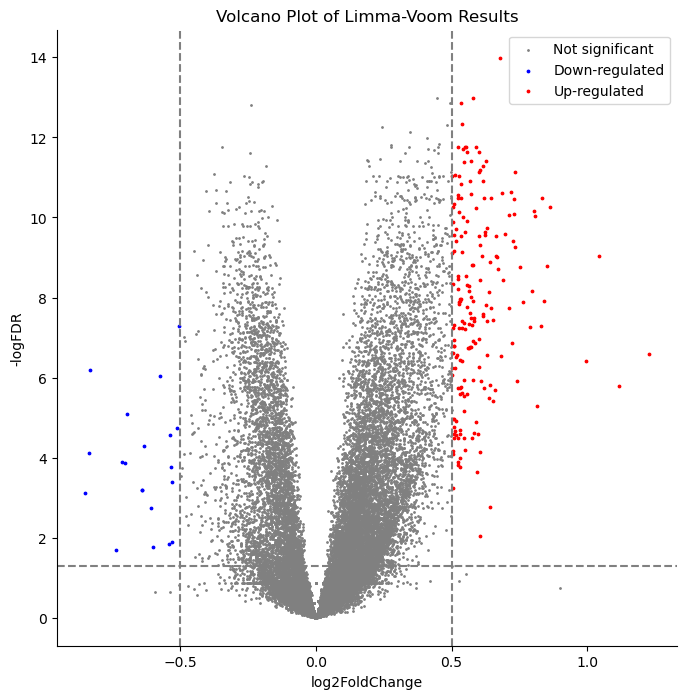

In [14]:
lv_volc_plot(lv_res=lv_res)

### Enrichment Analysis
We also performed enrichment analysis on the 209 significant genes returned.  As we can see, the adjusted p-value becomes quite large with very few significant results.  One cellular component does return as significantly enriched, shown in the graph below.

This has been identified in a previous study as well - Wu, L., Wang, W., Tian, S., Zheng, H., Liu, P., & Wu, W. (2021). Identification of Hub Genes in Patients with Alzheimer Disease and Obstructive Sleep Apnea Syndrome Using Integrated Bioinformatics Analysis. International journal of general medicine, 14, 9491–9502. https://doi.org/10.2147/IJGM.S341078


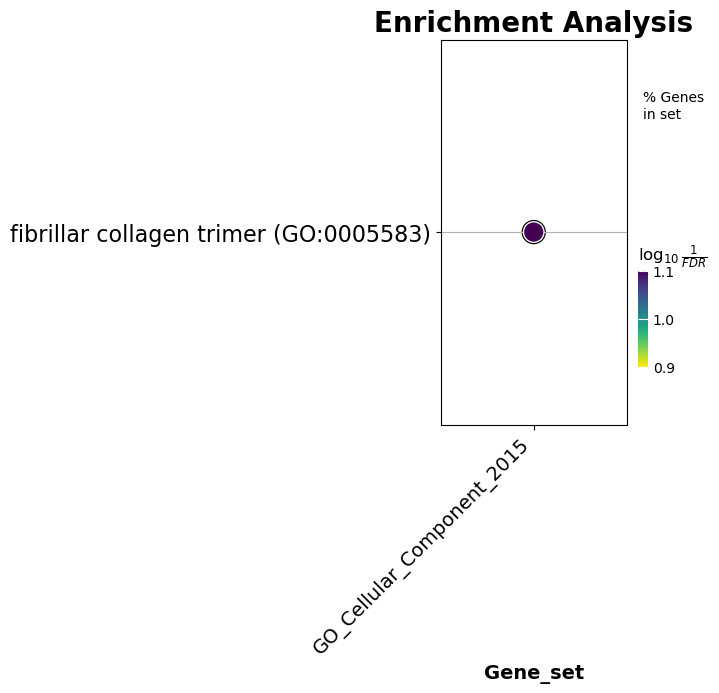

In [15]:
enr=enrichment_analysis(lv_genes_merged, )


In [16]:
pd.DataFrame(enr.results).sort_values(by='Adjusted P-value',ascending=True).head(15)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1235,GO_Cellular_Component_2015,fibrillar collagen trimer (GO:0005583),3/13,0.000298,0.049134,0,0,28.807282,233.890786,COL27A1;COL5A1;COL5A3
1236,GO_Cellular_Component_2015,neuronal postsynaptic density (GO:0097481),3/18,0.000817,0.067442,0,0,19.200000,136.498171,GPER1;SHANK3;SHANK1
922,WikiPathways_2016,miRNA targets in ECM and membrane receptors Ho...,4/41,0.000867,0.077148,0,0,10.417403,73.449593,COL5A1;COL5A3;COL6A2;COL6A1
1453,Disease_Signatures_from_GEO_up_2014,Huntington's Disease GSE3583,10/300,0.001273,0.108208,0,0,3.379137,22.526499,RPS28;COL6A2;COL6A1;SCX;SCRIB;ZNF469;PIP5K1C;A...
1237,GO_Cellular_Component_2015,collagen trimer (GO:0005581),5/91,0.002669,0.146808,0,0,5.615880,33.279514,COL27A1;COL5A1;COL6A2;COL5A3;COL6A1
1011,GO_Molecular_Function_2015,extracellular matrix structural constituent (G...,5/68,0.000726,0.162581,0,0,7.675070,55.477156,COL27A1;COL5A1;COL5A3;PRELP;MUC6
0,MSigDB_Hallmark_2020,Apical Surface,3/44,0.010875,0.239249,0,0,7.015155,31.717577,CROCC;HSPB1;ATP6V0A4
1239,GO_Cellular_Component_2015,extracellular matrix (GO:0031012),9/348,0.011199,0.369582,0,0,2.582124,11.598615,LAMA5;COL5A1;COL6A2;ADAMTS18;MMP17;COL6A1;PREL...
1238,GO_Cellular_Component_2015,neuron projection terminus (GO:0044306),3/44,0.010875,0.369582,0,0,7.015155,31.717577,KCNC3;GPER1;BSN
130,GO_Biological_Process_2018,protein localization to synapse (GO:0035418),2/10,0.004628,0.411374,0,0,23.892512,128.437533,SCRIB;SHANK1


### Perform Hierarchical Clustering
We chose to perform hierarchical clusteirng to see how genes and samples cluster.  The clustermap helps to visualize this.  We can see an intiial cluster of primarily Dementia samples with higher expression of the genes also clustered at the top left.  There is a cluster of non-dementia samples below this with the inverse pattern.  The remaining clusters seem to be mainly dementia or non-demebtia samples, but the gene expression differences are not as clear.

In [17]:
gene_ids, symbol_map, entrez_map = create_mapping_dicts(lv=lv_genes,genes=genes)

In [18]:
deg_reads=prep_matrix_for_clustering(tpm_matrix, gene_ids, symbol_map,)

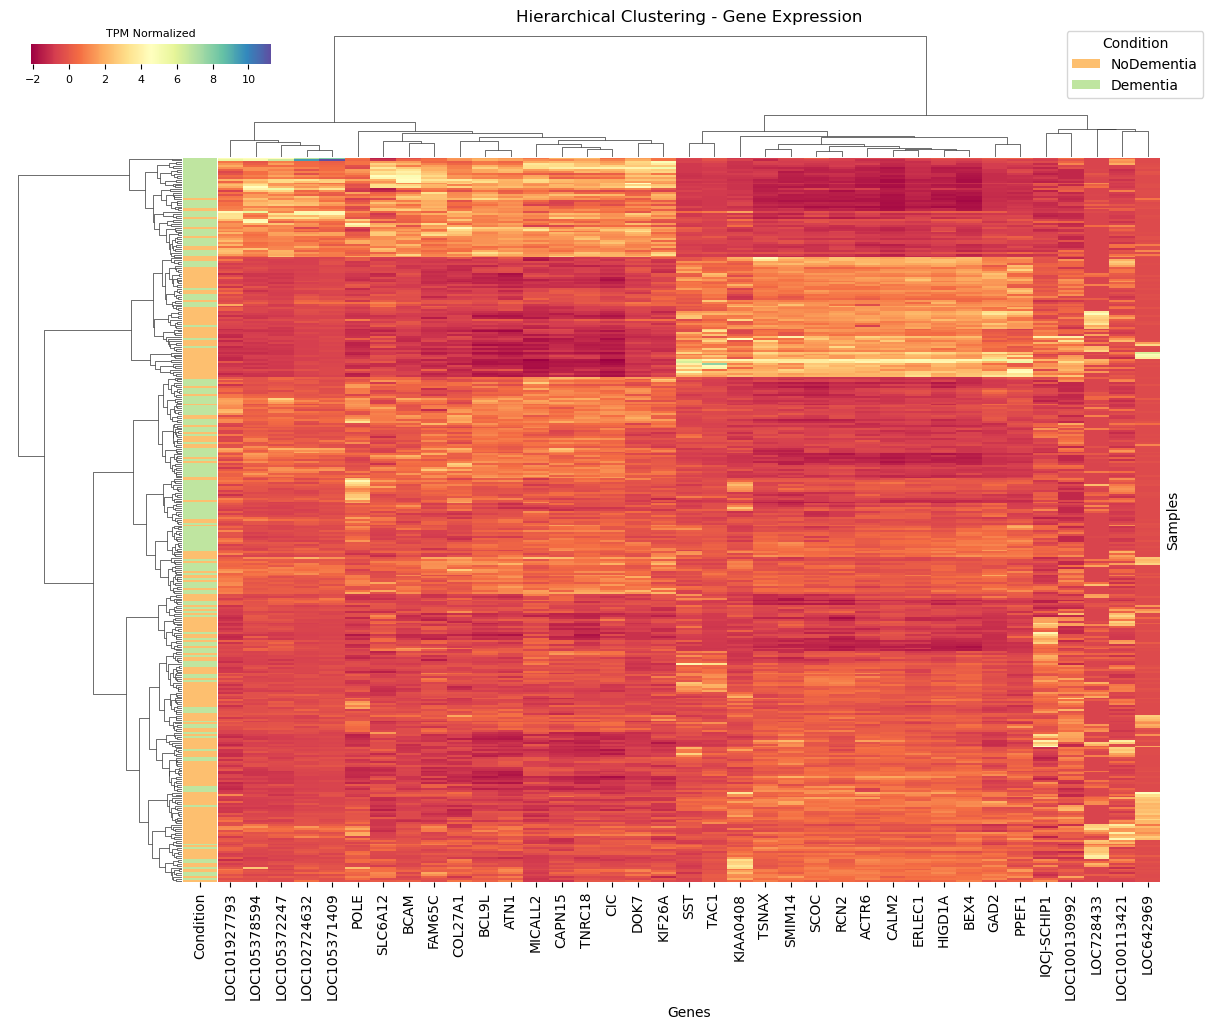

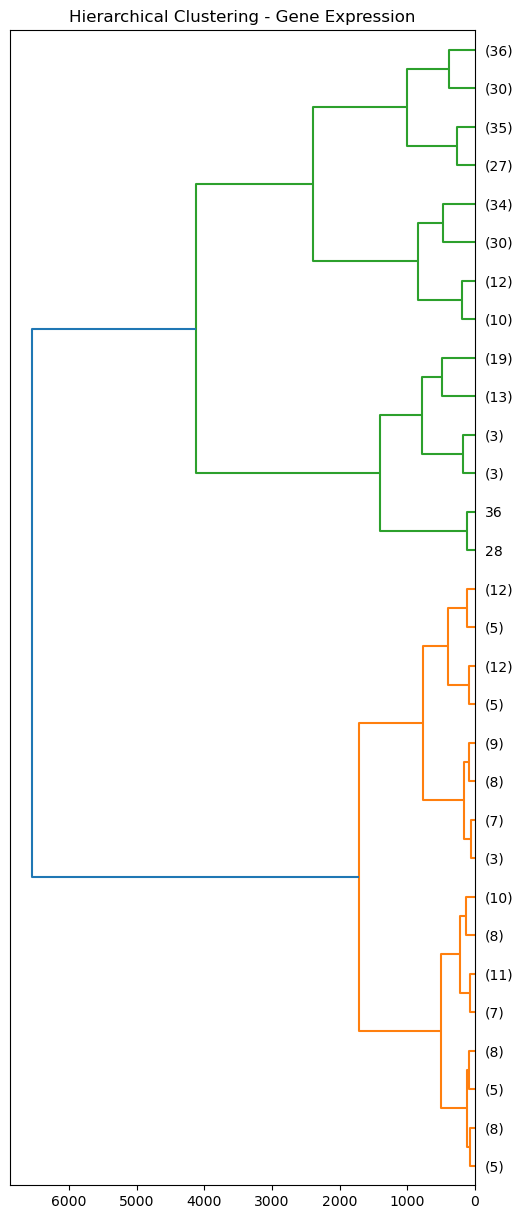

In [19]:
hierarchical_clustering(deg_reads, exp_design)


### Perform Other Clustering - K-means, K-medoids, HDBSCAN
We also clustered samples using these three algorithms. K-means and K-medoids seemed to pick up some differences between the samples with dementia and without dementia, but there is some noise where samples end up in enexpected clusters.

In [20]:
#scale data
x=scale_deg_reads(deg_reads)

kmeans evaluation
cluster 2: davies-bouldin: 1.3153496930216075 calinski harabasz: 183.46208155330177 silhouette: 0.27313378575917086
cluster 3: davies-bouldin: 1.3843771883115876 calinski harabasz: 152.20581682456861 silhouette: 0.22702028940617508
cluster 4: davies-bouldin: 1.7150475630843685 calinski harabasz: 122.74208621807068 silhouette: 0.1525526521194388
cluster 5: davies-bouldin: 1.8494965351883874 calinski harabasz: 100.01525005293153 silhouette: 0.13155005767688607
cluster 6: davies-bouldin: 1.8093465431367928 calinski harabasz: 91.742507643518 silhouette: 0.13366744161797098
cluster 7: davies-bouldin: 1.9534369918508603 calinski harabasz: 79.84289600239855 silhouette: 0.11852745597633155
cluster 8: davies-bouldin: 1.8264303751605198 calinski harabasz: 76.43865289512887 silhouette: 0.10509150688729586
cluster 9: davies-bouldin: 1.8336778021483982 calinski harabasz: 72.08197173317882 silhouette: 0.11052938164593881
cluster 10: davies-bouldin: 1.9063828808350738 calinski harab

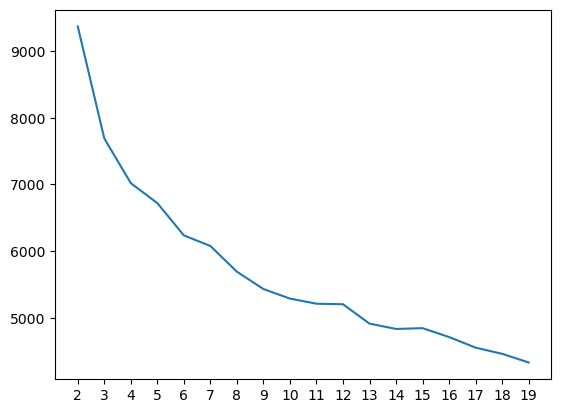

kmedoids evaluation
cluster 2: davies-bouldin: 1.2682793218633948 calinski harabasz: 179.960650843774 silhouette: 0.2862784701680173
cluster 3: davies-bouldin: 1.508434861120124 calinski harabasz: 144.37856262149046 silhouette: 0.19373877693290312
cluster 4: davies-bouldin: 1.961189416891345 calinski harabasz: 116.37875073104276 silhouette: 0.12314200978795402
cluster 5: davies-bouldin: 2.186274114741581 calinski harabasz: 93.11891977669838 silhouette: 0.10229242815924985
cluster 6: davies-bouldin: 2.0449823249565675 calinski harabasz: 84.53378731758113 silhouette: 0.09628831629766482
cluster 7: davies-bouldin: 2.267909673353796 calinski harabasz: 71.73779325128072 silhouette: 0.07480891375248332
cluster 8: davies-bouldin: 2.2387760240521493 calinski harabasz: 65.8637738723899 silhouette: 0.07964878639628793
cluster 9: davies-bouldin: 2.277549784367845 calinski harabasz: 62.173632430853154 silhouette: 0.07569832594669283
cluster 10: davies-bouldin: 2.070810764165952 calinski harabasz: 

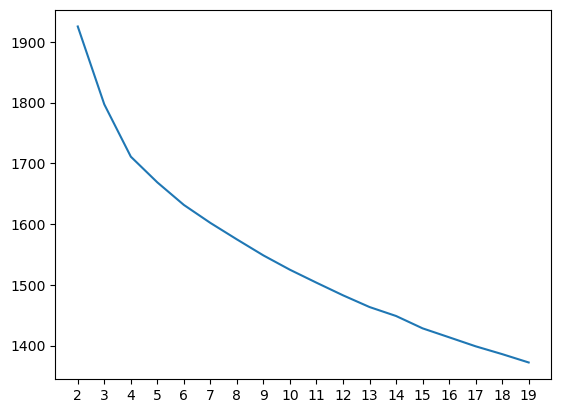

In [21]:
labels_kmeans=kmeans_clustering(x)
labels_kmed=kmedoids_clustering(x)
db_labels=hdbscan_clustering(x)

In [22]:
pca_res=pca_analysis(x)

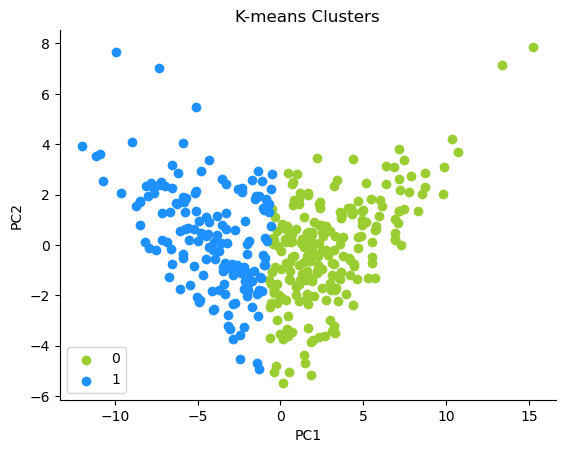

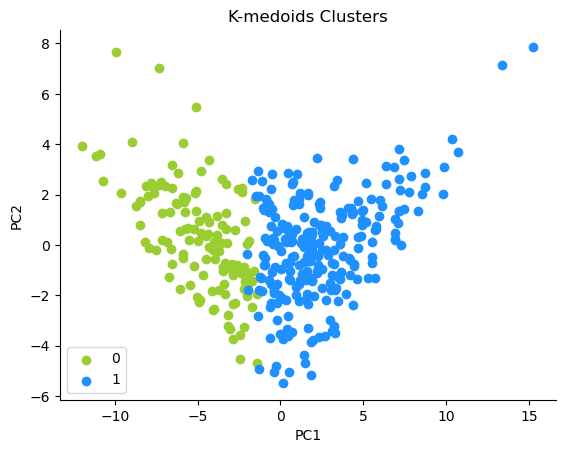

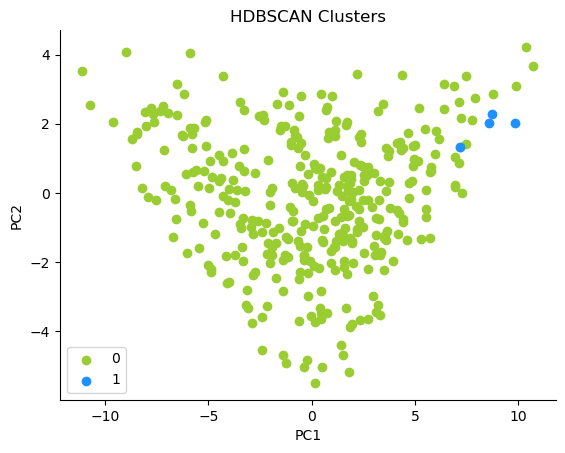

In [23]:
cluster_pca_graphs(n_clusters=2, labels=labels_kmeans, pca_res=pca_res, title='K-means Clusters')
cluster_pca_graphs(n_clusters=2, labels=labels_kmed, pca_res=pca_res, title='K-medoids Clusters')
cluster_pca_graphs(n_clusters=2, labels=db_labels, pca_res=pca_res, title='HDBSCAN Clusters')




In [24]:
clustering, clusters_df = cluster_demo_graphs(
    labels_kmeans,
    labels_kmed,
    db_labels,
    deg_reads,
    tbidata,
    donor,
)

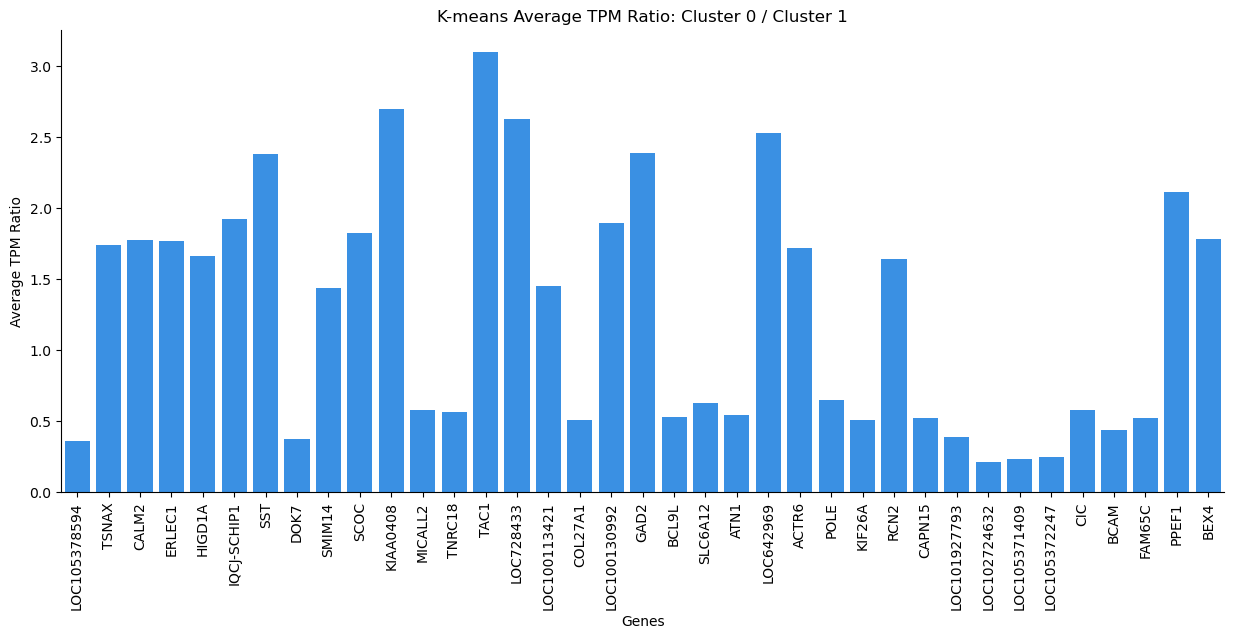

In [25]:
gene_expression_diff_graph(labels=labels_kmeans, clustering=clustering, title='K-means Average TPM Ratio: Cluster 0 / Cluster 1')

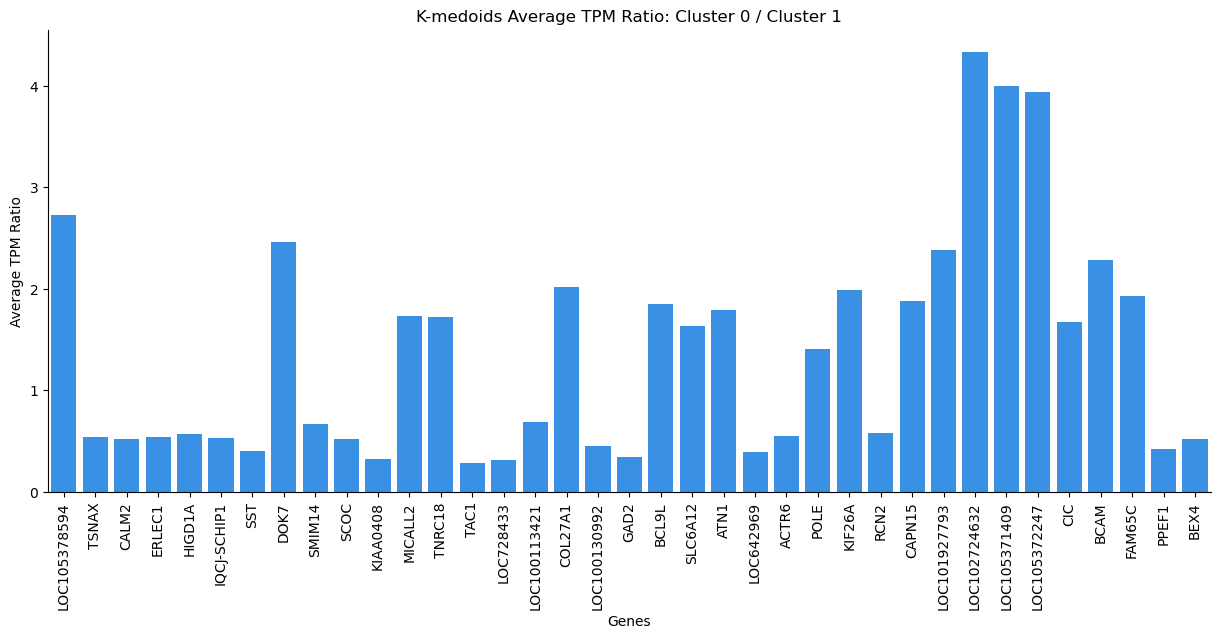

In [26]:
gene_expression_diff_graph(labels=labels_kmed, clustering=clustering, title='K-medoids Average TPM Ratio: Cluster 0 / Cluster 1')

In [27]:
clusters_df.columns

Index(['LOC105378594', 'TSNAX', 'CALM2', 'ERLEC1', 'HIGD1A', 'IQCJ-SCHIP1',
       'SST', 'DOK7', 'SMIM14', 'SCOC', 'KIAA0408', 'MICALL2', 'TNRC18',
       'TAC1', 'LOC728433', 'LOC100113421', 'COL27A1', 'LOC100130992', 'GAD2',
       'BCL9L', 'SLC6A12', 'ATN1', 'LOC642969', 'ACTR6', 'POLE', 'KIF26A',
       'RCN2', 'CAPN15', 'LOC101927793', 'LOC102724632', 'LOC105371409',
       'LOC105372247', 'CIC', 'BCAM', 'FAM65C', 'PPEF1', 'BEX4',
       'labels_kmeans', 'labels_db', 'labels_kmed', 'structure_name',
       'rnaseq_profile_id', 'age', 'sex', 'apo_e4_allele', 'education_years',
       'age_at_first_tbi', 'longest_loc_duration', 'cerad', 'num_tbi_w_loc',
       'dsm_iv_clinical_diagnosis', 'control_set', 'nincds_arda_diagnosis',
       'ever_tbi_w_loc', 'race', 'hispanic', 'act_demented', 'braak',
       'nia_reagan'],
      dtype='object')

In [28]:
lst=[]
for i in ['0','1']:
    dementia_percent=len(clusters_df[(clusters_df['act_demented']=='Dementia') & (clusters_df['labels_kmeans']==i)])/len(clusters_df[(clusters_df['labels_kmeans']==i)])
    
    no_dementia_percent=len(clusters_df[(clusters_df['act_demented']=='No Dementia') & (clusters_df['labels_kmeans']==i)])/len(clusters_df[(clusters_df['labels_kmeans']==i)])
    lst.append((i,no_dementia_percent, 'No Dementia')  )
    lst.append((i,dementia_percent, 'Dementia'))

dementia_percent_df=pd.DataFrame(lst,columns=['Cluster','Value','Status'])


In [29]:
dementia_percent_df=dementia_percent_df.pivot(index='Cluster',columns='Status',values='Value')

Status,Dementia,No Dementia
Cluster,,
0,31.111111,68.888889
1,72.368421,27.631579


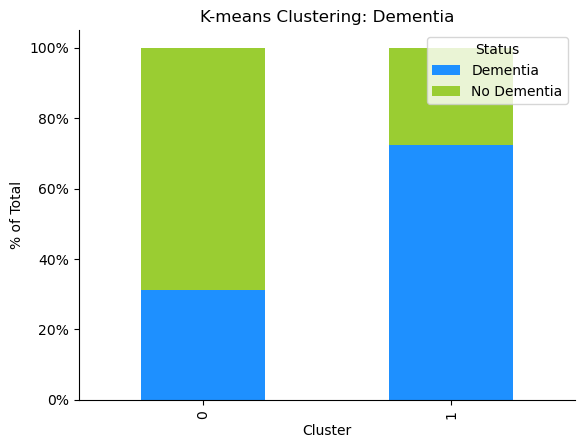

In [30]:
kmeans_dementia_df=dementia_cluster_plot(clusters_df=clusters_df, labels='labels_kmeans', title='K-means Clustering: Dementia')
kmeans_dementia_df.head()

Status,Dementia,No Dementia
Cluster,,
0,75.000000,25.000000
1,34.387352,65.612648


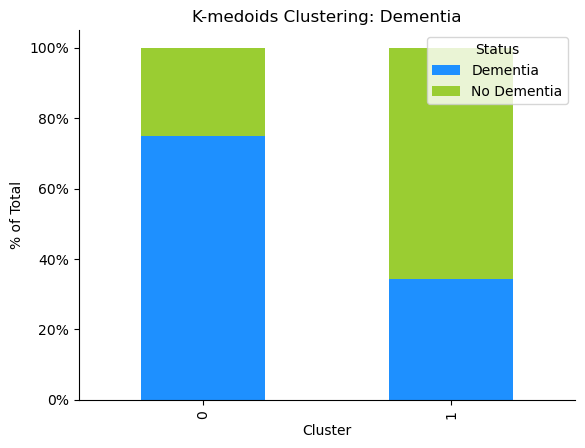

In [31]:
kmeds_dementia_df=dementia_cluster_plot(clusters_df=clusters_df, labels='labels_kmed', title='K-medoids Clustering: Dementia')
kmeds_dementia_df.head()
